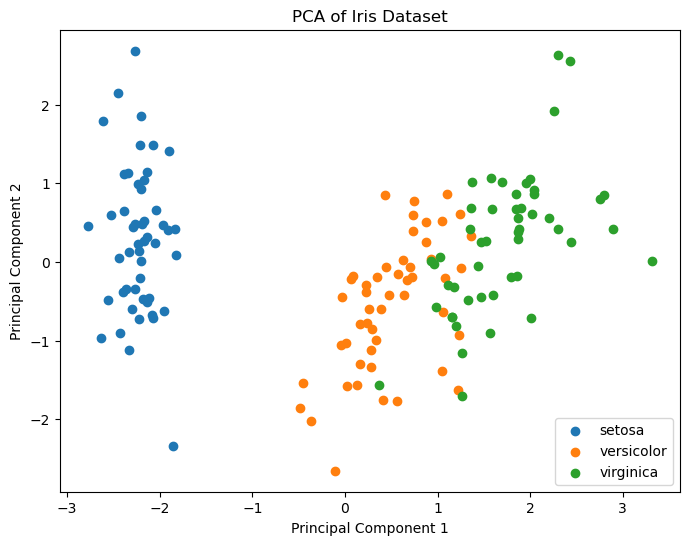

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 

# Ensure plots display inline in Jupyter
%matplotlib inline

# Load Iris dataset and save as CSV 
iris = load_iris() 
df = pd.DataFrame(iris.data, columns=iris.feature_names) 
df['target'] = iris.target 
df.to_csv('iris.csv', index=False) 

# Read CSV 
df = pd.read_csv('iris.csv') 

# Separate features and target 
X = df.drop('target', axis=1) 

# Standardize features 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 

# Apply PCA to reduce to 2 components 
pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X_scaled) 

# Create DataFrame with PCA results 
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2']) 
df_pca['target'] = df['target'] 

# Visualize PCA results 
plt.figure(figsize=(8, 6)) 
for target in df_pca['target'].unique(): 
    subset = df_pca[df_pca['target'] == target] 
    plt.scatter(subset['PC1'], subset['PC2'], label=iris.target_names[target]) 

plt.xlabel('Principal Component 1') 
plt.ylabel('Principal Component 2') 
plt.title('PCA of Iris Dataset') 
plt.legend() 
plt.show()  # <- CHANGED
